In [2]:
import pandas as pd
import subprocess

### predicted RNA-binding domain for mouse proteins with ChIP-seq data in Cistrome DB

In [2]:
%%bash

bash tripep_prediction.sh ../ProteinSequence/mouse_proteome.fasta

---- > ATTENTION: Application use suboptimal classification cutoff
---- > we recommend a threshold = 0.68

positive set size: 1806
positive set size: 12038
[1] "read data"
[1] "build model"
[1] "get feature weights"
[1] "predict"
[1] "write prediction output table"
[1] "write weights output"


In [3]:
# RNA-binding protein by TripepSVM

df_mouse_TriPepSVM = pd.read_csv("Results/mouse_proteome.TriPepSVM.pred.txt", header = None, sep = "\t")
df_mouse_TriPepSVM_RBP = df_mouse_TriPepSVM.loc[df_mouse_TriPepSVM[2] == "RNA-binding protein", :]
mouse_TriPepSVM_RBP_uids = list(map(lambda x:x.split("|")[1], df_mouse_TriPepSVM_RBP.iloc[:,0].values))
mouse_TriPepSVM_RBP_proteins = list(map(lambda x:x.split("|")[2], df_mouse_TriPepSVM_RBP.iloc[:,0].values))

df_mouse_TriPepSVM_RBP_labeled = pd.DataFrame([mouse_TriPepSVM_RBP_uids, mouse_TriPepSVM_RBP_proteins, df_mouse_TriPepSVM_RBP.iloc[:, 1].values, df_mouse_TriPepSVM_RBP.iloc[:, 2].values]).T
df_mouse_TriPepSVM_RBP_labeled.columns = ["uid", "protein", "score", "status"]
df_mouse_TriPepSVM_RBP_labeled.head()
df_mouse_TriPepSVM_RBP_labeled.to_csv("mouse_TriPepSVM_RBP.txt", header = True, sep = "\t", index = False)


### predicted RNA-binding domain for human proteins with ChIP-seq data in Cistrome DB

In [4]:
%%bash

bash tripep_prediction.sh ../ProteinSequence/human_proteome.fasta

---- > ATTENTION: Application use suboptimal classification cutoff
---- > we recommend a threshold = 0.68

positive set size: 1806
positive set size: 12038
[1] "read data"
[1] "build model"
[1] "get feature weights"
[1] "predict"
[1] "write prediction output table"
[1] "write weights output"


In [5]:
df_human_TriPepSVM = pd.read_csv("Results/human_proteome.TriPepSVM.pred.txt", header = None, sep = "\t")
df_human_TriPepSVM_RBP = df_human_TriPepSVM.loc[df_human_TriPepSVM[2] == "RNA-binding protein", :]
human_TriPepSVM_RBP_uids = list(map(lambda x:x.split("|")[1], df_human_TriPepSVM_RBP.iloc[:,0].values))
human_TriPepSVM_RBP_proteins = list(map(lambda x:x.split("|")[2], df_human_TriPepSVM_RBP.iloc[:,0].values))

df_human_TriPepSVM_RBP_labeled = pd.DataFrame([human_TriPepSVM_RBP_uids, human_TriPepSVM_RBP_proteins, df_human_TriPepSVM_RBP.iloc[:, 1].values, df_human_TriPepSVM_RBP.iloc[:, 2].values]).T
df_human_TriPepSVM_RBP_labeled.columns = ["uid", "protein", "score", "status"]
df_human_TriPepSVM_RBP_labeled.head()
df_human_TriPepSVM_RBP_labeled.to_csv("human_TriPepSVM_RBP.txt", header = True, sep = "\t", index = False)


### stat

In [13]:
df_mouse_TriPepSVM = pd.read_csv("Results/mouse_proteome.TriPepSVM.pred.txt", header = None, sep = "\t")
df_human_TriPepSVM = pd.read_csv("Results/human_proteome.TriPepSVM.pred.txt", header = None, sep = "\t")

mouse_RBP = sum(df_mouse_TriPepSVM[2] == "RNA-binding protein")
mouse_nonRBP = sum(df_mouse_TriPepSVM[2] == "Non RNA-binding protein")

human_RBP = sum(df_human_TriPepSVM[2] == "RNA-binding protein")
human_nonRBP = sum(df_human_TriPepSVM[2] == "Non RNA-binding protein")

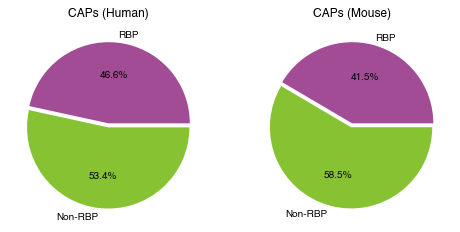

In [31]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline

fig, axs = plt.subplots(figsize = (8, 4), nrows = 1, ncols = 2)
ax1 = axs[0]
ax2 = axs[1]

ax1.pie(
    x = [human_RBP,
         human_nonRBP
        ],
    explode = [0, 0.05], 
    labels = ["RBP", "Non-RBP"], 
    autopct='%.1f%%', 
    shadow = False, 
    colors = ["#A14C94", "#87C232"]
       )
ax1.set_title("CAPs (Human)")

ax2.pie(
    x = [mouse_RBP,
         mouse_nonRBP
        ],
    explode = [0, 0.05], 
    labels = ["RBP", "Non-RBP"], 
    autopct='%.1f%%', 
    shadow = False, 
    colors = ["#A14C94", "#87C232"]
       )
ax2.set_title("CAPs (Mouse)")

plt.subplots_adjust(wspace = 0.2)
plt.savefig("CAP_RBP_fraction.pdf")


In [12]:
df_mouse_TriPepSVM

,0,1,2
0,tr|A0A023UED4|A0A023UED4_MOUSE,0.332242,RNA-binding protein
1,tr|A0A023UF19|A0A023UF19_MOUSE,-0.265671,Non RNA-binding protein
2,sp|A0A087WPF7|AUTS2_MOUSE,0.253345,Non RNA-binding protein
3,tr|A0A087WPK9|A0A087WPK9_MOUSE,0.700812,RNA-binding protein
4,tr|A0A087WQX6|A0A087WQX6_MOUSE,0.708250,RNA-binding protein
...,...,...,...
804,sp|Q9Z2D8|MBD3_MOUSE,0.639473,RNA-binding protein
805,sp|Q9Z2E1|MBD2_MOUSE,0.901391,RNA-binding protein
806,sp|Q9Z2E2|MBD1_MOUSE,-0.620084,Non RNA-binding protein
807,sp|Q9Z2F6|BCL3_MOUSE,-0.492388,Non RNA-binding protein


In [32]:
print(human_RBP, human_nonRBP, mouse_RBP, mouse_nonRBP)

806 924 336 473


In [22]:
human_nonRBP

924

In [23]:
806/(806 + 924)

0.4658959537572254